# Recommender Systems with Python

In this notebook, I will be developing a basic recommendation system by suggesting items that are most similar to a particular item, in this case, movies. Keep in mind, this is not a true robust recommendation system, to describe it more accurately,it just tells you what movies/items are most similar to your movie choice.


Let's get started!

## Import Libraries

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Enable inline plotting
%matplotlib inline

# Get the data

In [50]:
df1 = pd.read_csv('Data/movies.csv')
df1.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [51]:
df2 = pd.read_csv('Data/ratings.csv')
df2.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [52]:
df3 = pd.read_csv('Data/tags.csv')
df3.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [53]:
df4 = pd.merge(df2,df3,on=['userId','movieId'],how='left')
df = pd.merge(df4,df1,on=['movieId'],how='left')
df.head()

,userId,movieId,rating,timestamp_x,tag,timestamp_y,title,genres
0,1,1,4.0,964982703,NaN,NaN,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,NaN,NaN,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,NaN,NaN,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,NaN,NaN,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,NaN,NaN,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


# Exploratory Data Analysis
Let's take a look at some of the best rated movies.

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [55]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
I'm the One That I Want (2000)           5.0
Vacations in Prostokvashino (1980)       5.0
My Love (2006)                           5.0
Cherish (2002)                           5.0
Paper Birds (Pájaros de papel) (2010)    5.0
Name: rating, dtype: float64

In [56]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Pulp Fiction (1994)                 484
Forrest Gump (1994)                 335
Shawshank Redemption, The (1994)    319
Silence of the Lambs, The (1991)    283
Matrix, The (1999)                  280
Name: rating, dtype: int64

In [57]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


New 'Number of Ratings' Column

In [58]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
#df = pd.merge(df,ratings,on='title')
#df.head()
ratings.sort_values(['num of ratings','rating'],ascending=False).head(10)

,rating,num of ratings
title,,
Pulp Fiction (1994),4.487603,484
Forrest Gump (1994),4.155224,335
"Shawshank Redemption, The (1994)",4.432602,319
"Silence of the Lambs, The (1991)",4.173145,283
"Matrix, The (1999)",4.183929,280
Fight Club (1999),4.402985,268
Star Wars: Episode IV - A New Hope (1977),4.244275,262
Braveheart (1995),4.046939,245
Jurassic Park (1993),3.750000,238


# Getting more insights about the ratings

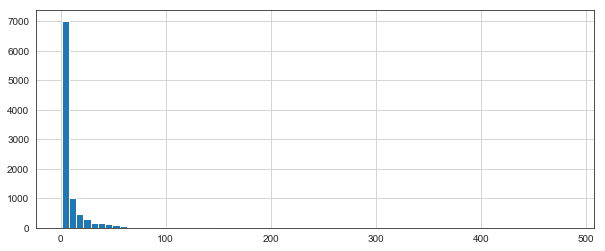

In [59]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

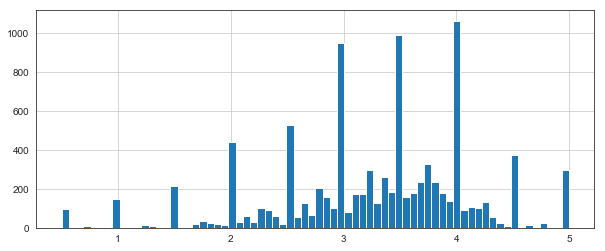

In [60]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

## Number of Ratings vs Ratings plotting

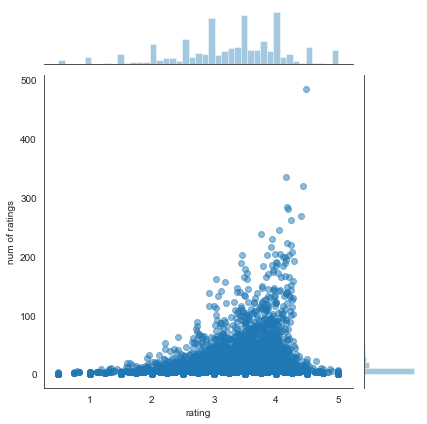

In [61]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

# Recommending Similar Movies

In the next step, I am going to create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating which the user gave to that movie. There will be a lot of NaN values, because most people have not seen most of the. movies.


In [62]:
moviematrix = df.pivot_table(index='userId',columns='title',values='rating')
moviematrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Pulp Fiction (1994),4.487603,484
Forrest Gump (1994),4.155224,335
"Shawshank Redemption, The (1994)",4.432602,319
"Silence of the Lambs, The (1991)",4.173145,283
"Matrix, The (1999)",4.183929,280
Fight Club (1999),4.402985,268
Star Wars: Episode IV - A New Hope (1977),4.244275,262
Braveheart (1995),4.046939,245
Jurassic Park (1993),3.750000,238


## Let's choose Braveheart.

We will grab the user ratings for those two movies:

In [64]:
braveheart_user_ratings = moviematrix['Braveheart (1995)']
braveheart_user_ratings.head()

userId
1    4.0
2    NaN
3    NaN
4    NaN
5    4.0
Name: Braveheart (1995), dtype: float64

We can then use corrwith() method to get correlations between two pandas series:

In [65]:
similar_to_braveheart = moviematrix.corrwith(braveheart_user_ratings)

/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Let's clean this by removing NaN values and using a DataFrame instead of a series:


In [66]:
corr_braveheart = pd.DataFrame(similar_to_braveheart,columns=['Correlation'])
corr_braveheart.dropna(inplace=True)
corr_braveheart.head()

,Correlation
title,
"'burbs, The (1989)",0.332504
(500) Days of Summer (2009),0.021388
*batteries not included (1987),-1.000000
...And Justice for All (1979),0.327327
10 Cloverfield Lane (2016),0.534522


Now if we sort the dataframe by correlation, we should get the most similar movies

In [67]:
corr_braveheart.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Sisters (2015),1.0
"Class, The (Klass) (2007)",1.0
Ulee's Gold (1997),1.0
Say It Isn't So (2001),1.0
Savannah Smiles (1982),1.0
Chasers (1994),1.0
Children of Dune (2003),1.0
Living Out Loud (1998),1.0
Underworld (1996),1.0


## Filters on movies: Removing movies with less than 100 ratings 

In [68]:
corr_braveheart = corr_braveheart.join(ratings['num of ratings'])
corr_braveheart.head()

,Correlation,num of ratings
title,,
"'burbs, The (1989)",0.332504,17
(500) Days of Summer (2009),0.021388,49
*batteries not included (1987),-1.000000,7
...And Justice for All (1979),0.327327,3
10 Cloverfield Lane (2016),0.534522,15


Now I will sort the values and note how the titles make a lot more sense:

In [69]:
corr_braveheart[corr_braveheart['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Braveheart (1995),1.000000,245
Batman Begins (2005),0.610550,116
Ocean's Eleven (2001),0.575751,119
Inception (2010),0.555414,165
"Matrix, The (1999)",0.496045,280


Check the titles. These are some of the closest movies to braveheart in terms of how the users have rated them